In [506]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
from colorama import Style,Fore

Text(0.5, 1.0, 'asdadas')

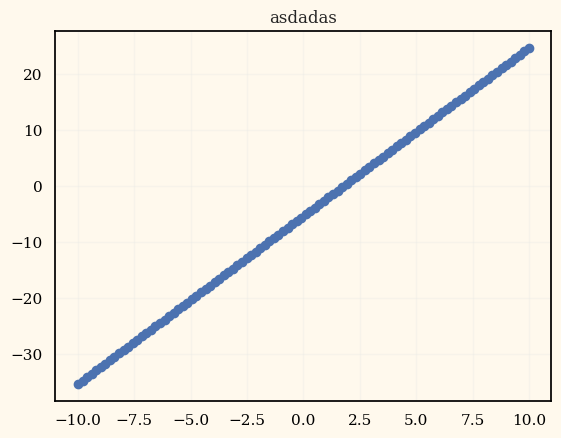

In [507]:
rc = {
    "axes.facecolor": "#FFF9ED",
    "figure.facecolor": "#FFF9ED",
    "axes.edgecolor": "#000000",
    "grid.color": "#EBEBE7",
    "font.family": "serif",
    "axes.labelcolor": "#000000",
    "xtick.color": "#000000",
    "ytick.color": "#000000",
    "grid.alpha": 0.4
}

sns.set(rc=rc)

X = np.linspace(-10, 10, 100)
y = X*3+np.random.randn() * 10
plt.scatter(X, y)
plt.title('asdadas')

In [508]:
warnings.filterwarnings(action = 'ignore')

blk = Style.BRIGHT + Fore.BLACK
red = Style.BRIGHT + Fore.RED
blu = Style.BRIGHT + Fore.BLUE
res = Style.RESET_ALL

In [509]:
print(f'{blu}하이{res}')
print('하잉')

하이
하잉


In [510]:
data = pd.read_csv('dataset_heart.csv')
data.shape

(270, 14)

In [511]:
from sklearn.model_selection import train_test_split

X = data.drop('heart disease', axis = 1)
y = data['heart disease']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)


In [512]:
df = X_train.copy()
df['target'] = y_train

In [513]:
result = pd.DataFrame()
result['column'] = df.columns
result['Count'] = df.count().values
result['missing'] = df.isna().sum().values
result['missing %'] = df.isna().sum().values / len(df)
result['nunique'] = df.nunique().values
result['mean'] = df.describe().T['mean'].values
result['std'] = df.describe().T['std'].values
result['median'] = df.describe().T['50%'].values
result['min'] = df.describe().T['min'].values
result['max'] = df.describe().T['max'].values
result


,column,Count,missing,missing %,nunique,mean,std,median,min,max
0,age,202,0,0.0,40,54.960396,9.299249,56.00,29.0,76.0
1,sex,202,0,0.0,2,0.688119,0.464413,1.00,0.0,1.0
2,chest pain type,202,0,0.0,4,3.183168,0.977922,4.00,1.0,4.0
3,resting blood pressure,202,0,0.0,45,131.465347,18.004457,130.00,94.0,200.0
4,serum cholestoral,202,0,0.0,124,249.990099,52.021522,243.00,141.0,564.0
5,fasting blood sugar,202,0,0.0,2,0.138614,0.346402,0.00,0.0,1.0
6,resting electrocardiographic results,202,0,0.0,3,1.049505,0.996274,2.00,0.0,2.0
7,max heart rate,202,0,0.0,78,148.896040,23.050757,153.00,71.0,202.0
8,exercise induced angina,202,0,0.0,2,0.351485,0.478620,0.00,0.0,1.0
9,oldpeak,202,0,0.0,38,1.115842,1.176743,0.95,0.0,6.2


In [514]:
# nunique 보다 많음
cat_col = df.columns[result[result['nunique'] < 5].index]
num_col = df.columns[result[result['nunique'] >= 5].index]

## EDA

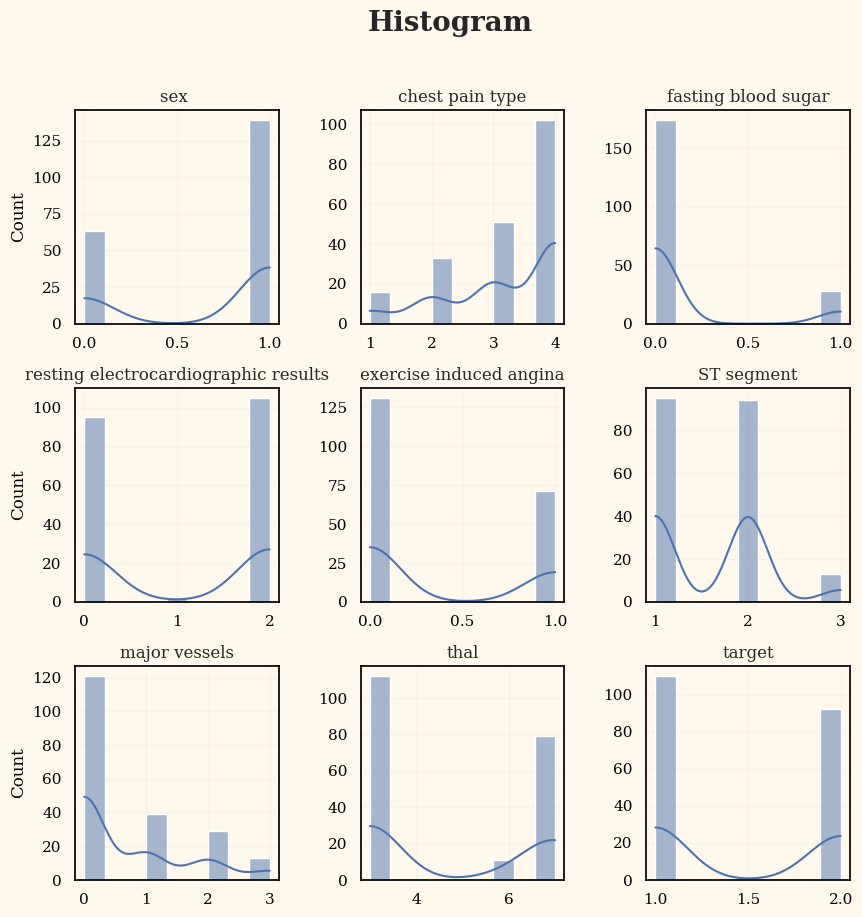

In [515]:
fig, ax = plt.subplots(nrows = 3, ncols = 3,
             figsize = (10,10))

# 서브플롯 간격
fig.subplots_adjust(wspace = 0.4, hspace = 0.3)

ax = ax.flatten() # 2차원 배열을 1차원으로 변경
# ax[0][0] -> ax[0]


for i, col in enumerate(cat_col):
    sns.histplot(df, x = col, ax = ax[i], kde = True)
    ax[i].set_title(col)
    ax[i].set_xlabel('')

    if i % 3 != 0:
        ax[i].set_ylabel('')
    fig.suptitle('Histogram', fontsize = 20, weight = 'bold')

## Numeric

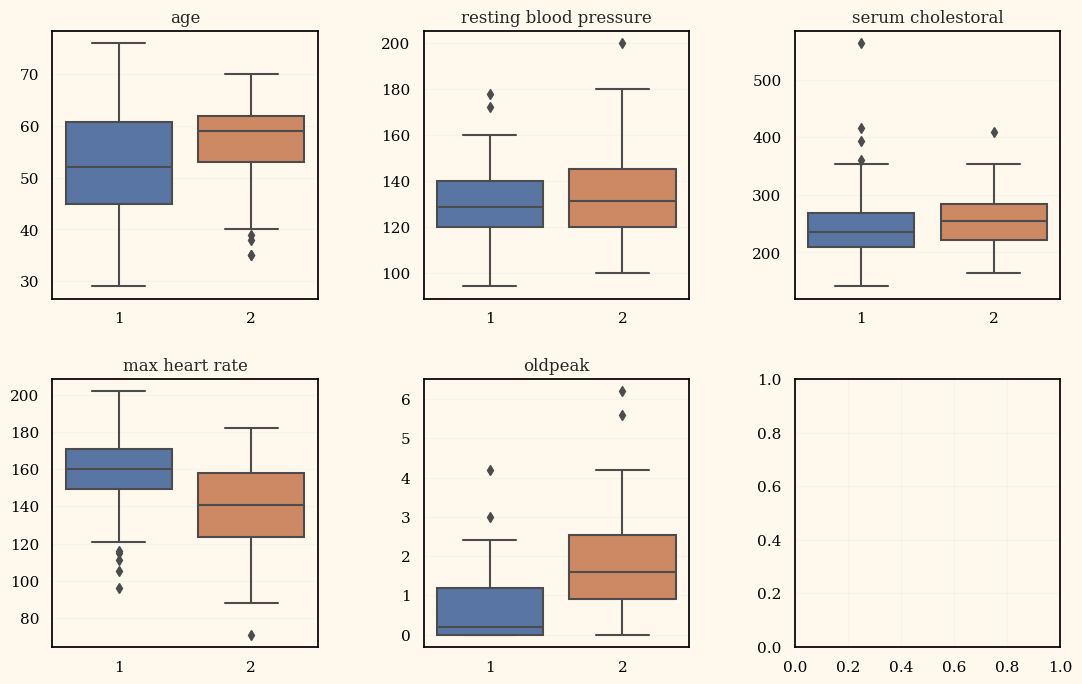

In [516]:
fig, ax = plt.subplots(nrows = 2, ncols = 3, figsize = (13, 8))

fig.subplots_adjust(wspace = 0.4, hspace = 0.3)
ax = ax.flatten()
for i, col in enumerate(num_col):
    sns.boxplot(data = df, x = 'target', y = col, ax=ax[i])
    ax[i].set_title(col)
    ax[i].set_xlabel('')
    ax[i].set_ylabel('')

Text(0.5, 0.98, 'Regplot')

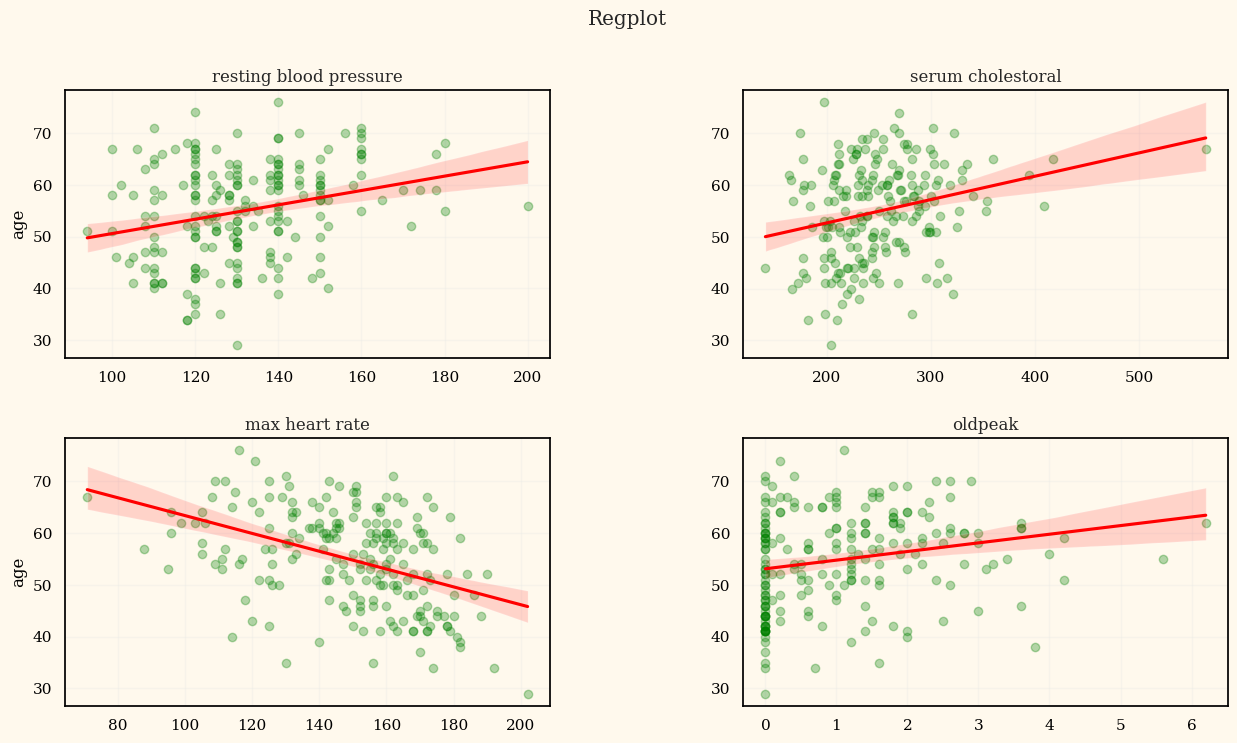

In [517]:
fig, ax = plt.subplots(nrows = 2, ncols = 2, figsize = (15, 8))

fig.subplots_adjust(wspace = 0.4, hspace = 0.3)
ax = ax.flatten()
for i, col in enumerate(num_col[1:]):
    sns.regplot(data = df, x = col, y = 'age', ax=ax[i],
                scatter_kws = {'color':'green', 'alpha':0.3},
                line_kws = {'color':'red'})
    ax[i].set_title(col)
    ax[i].set_xlabel('')
    
    if i % 2 != 0:
        ax[i].set_ylabel('')

fig.suptitle('Regplot')

Text(0.5, 0.98, 'Regplot')

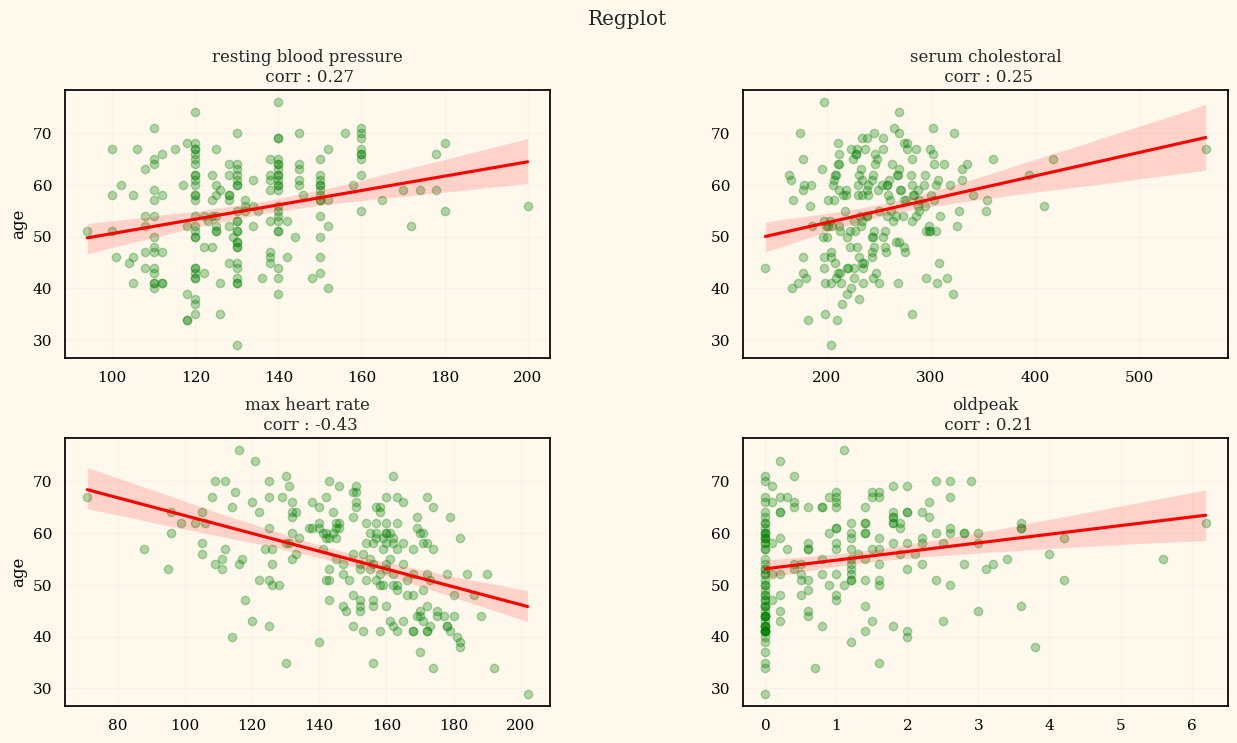

In [518]:
fig, ax = plt.subplots(nrows = 2, ncols = 2, figsize = (15, 8))

fig.subplots_adjust(wspace = 0.4, hspace = 0.3)
ax = ax.flatten()
for i, col in enumerate(num_col[1:]):

    cor = round(df[['age',col]].corr().iloc[0,1],2)

    sns.regplot(data = df, x = col, y = 'age', ax=ax[i],
                scatter_kws = {'color':'green', 'alpha':0.3},
                line_kws = {'color':'red'})
    ax[i].set_title(f'{col}\n corr : {cor}')
    ax[i].set_xlabel('')
    
    if i % 2 != 0:
        ax[i].set_ylabel('')

fig.suptitle('Regplot')

In [519]:
df[['age','oldpeak']].corr()

,age,oldpeak
age,1.000000,0.210969
oldpeak,0.210969,1.000000


```python
df[['age','oldpeak']].corr().iloc[행의 번호, 열의 번호]
```

In [520]:
df[['age','oldpeak']].corr().iloc[0, 1]

0.21096850110287227

In [521]:
import matplotlib as mpl

cmap = sns.diverging_palette(250, 0, as_cmap = True)

In [522]:
boundary = np.arange(-1, 1.2, 0.2)
boundary

array([-1.00000000e+00, -8.00000000e-01, -6.00000000e-01, -4.00000000e-01,
       -2.00000000e-01, -2.22044605e-16,  2.00000000e-01,  4.00000000e-01,
        6.00000000e-01,  8.00000000e-01,  1.00000000e+00])

In [523]:
norm = mpl.colors.BoundaryNorm(boundary, cmap.N)

In [524]:
np.triu(np.ones_like(df.corr()))

array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]])

<AxesSubplot:>

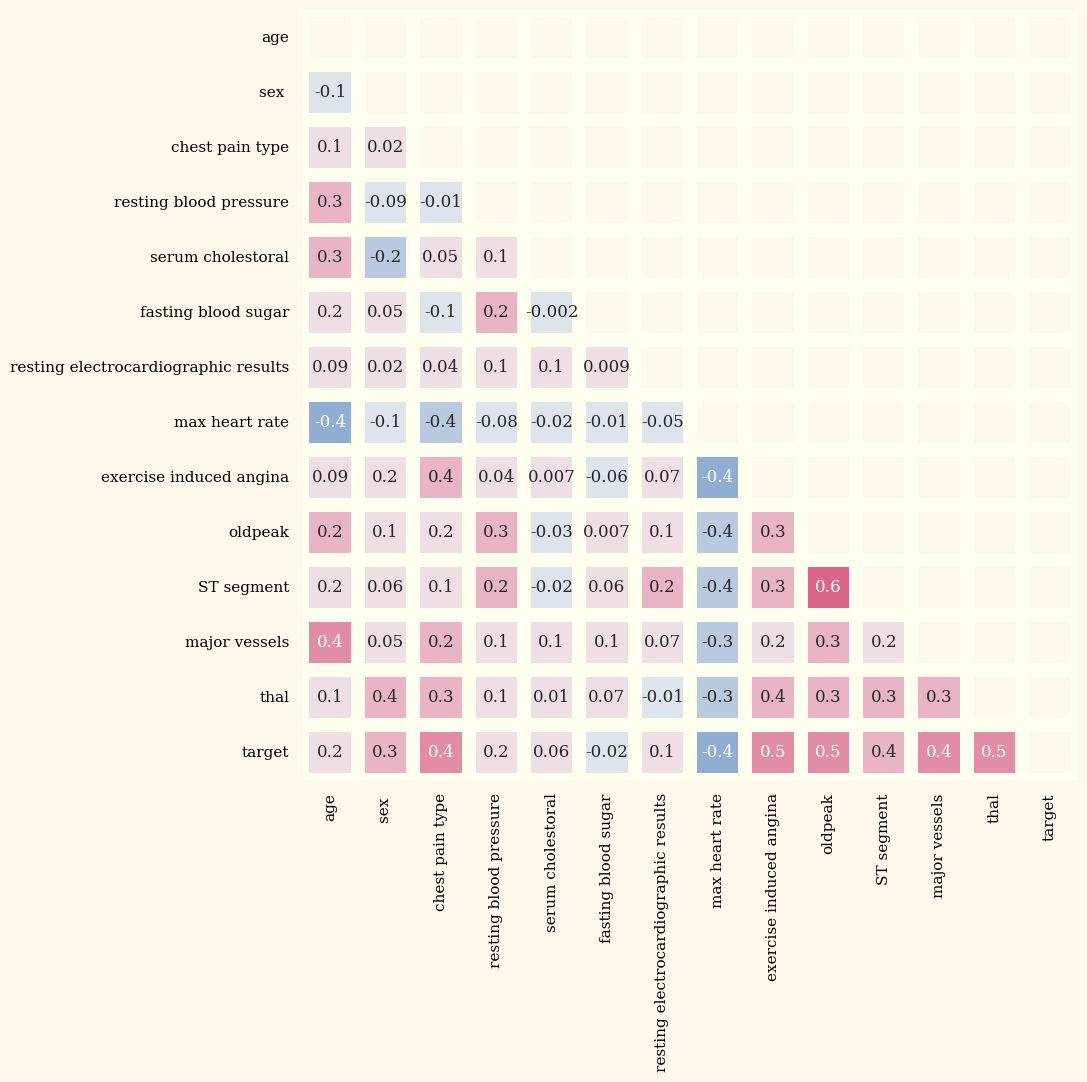

In [525]:
plt.figure(figsize=(10,10))
mask = np.triu(np.ones_like(df.corr()))
sns.heatmap(df.corr(), mask=mask, annot=True, cmap = cmap, norm = norm,
            fmt = '.1g', linewidths = 10, linecolor = '#FFFFF0', cbar = False)

In [526]:
# cor = df.corr()
# cond = np.abs(cor) >= 0.4
# real_corr = 

## Modeling

앙상블 모델: 단일 모델을 가지고 여러 개를 조합 

In [527]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV,train_test_split,KFold
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import VotingClassifier

# from mlxtend.classifier import StackingClassifier

In [528]:
X = df.drop('target', axis = 1)
y = df['target']

X_train, X_real, y_train, y_real = train_test_split(X, y, test_size=0.1, random_state=42)

## Feature Engineering

In [529]:
X_train

,age,sex,chest pain type,resting blood pressure,serum cholestoral,fasting blood sugar,resting electrocardiographic results,max heart rate,exercise induced angina,oldpeak,ST segment,major vessels,thal
201,58,1,4,125,300,0,2,171,0,0.0,1,2,7
203,51,1,4,140,299,0,0,173,1,1.6,1,0,7
32,37,0,3,120,215,0,0,170,0,0.0,1,0,3
167,53,1,3,130,197,1,2,152,0,1.2,3,0,3
35,48,1,4,130,256,1,2,150,1,0.0,1,2,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
64,63,1,1,145,233,1,2,150,0,2.3,3,0,6
251,44,1,2,130,219,0,2,188,0,0.0,1,0,3
122,57,1,4,152,274,0,0,88,1,1.2,2,1,7
48,66,1,2,160,246,0,0,120,1,0.0,2,3,6


In [530]:
X_train.columns

Index(['age', 'sex ', 'chest pain type', 'resting blood pressure',
       'serum cholestoral', 'fasting blood sugar',
       'resting electrocardiographic results', 'max heart rate',
       'exercise induced angina', 'oldpeak', 'ST segment', 'major vessels',
       'thal'],
      dtype='object')

In [531]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 181 entries, 201 to 261
Data columns (total 13 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   age                                   181 non-null    int64  
 1   sex                                   181 non-null    int64  
 2   chest pain type                       181 non-null    int64  
 3   resting blood pressure                181 non-null    int64  
 4   serum cholestoral                     181 non-null    int64  
 5   fasting blood sugar                   181 non-null    int64  
 6   resting electrocardiographic results  181 non-null    int64  
 7   max heart rate                        181 non-null    int64  
 8   exercise induced angina               181 non-null    int64  
 9   oldpeak                               181 non-null    float64
 10  ST segment                            181 non-null    int64  
 11  major vessels    

```python
def non_tree_preprocessing(data):
    

    cols = ['sex ', 'chest pain type',
       'fasting blood sugar',
       'resting electrocardiographic results',
       'exercise induced angina', 'oldpeak', 'ST segment', 'major vessels',
       'thal']
    
    for col in cols:

        data[col] = data[col].astype('str')

    data = pd.get_dummies(data)
    feature_name = data.columns

    scaler = MinMaxScaler()
    data = scaler.fit_transform(data)

    data = pd.DataFrame(scaler.fit_transform(data),
                        columns = feature_name)

    return data
```

In [532]:
non_tree_preprocessing(X_train).describe()

,age,resting blood pressure,serum cholestoral,max heart rate,sex _0,sex _1,chest pain type_1,chest pain type_2,chest pain type_3,chest pain type_4,...,ST segment_1,ST segment_2,ST segment_3,major vessels_0,major vessels_1,major vessels_2,major vessels_3,thal_3,thal_6,thal_7
count,181.000000,181.000000,181.000000,181.000000,181.000000,181.000000,181.000000,181.000000,181.000000,181.000000,...,181.000000,181.000000,181.000000,181.000000,181.000000,181.000000,181.000000,181.000000,181.000000,181.000000
mean,0.554955,0.352705,0.256064,0.601535,0.331492,0.668508,0.088398,0.171271,0.248619,0.491713,...,0.480663,0.447514,0.071823,0.613260,0.193370,0.132597,0.060773,0.569061,0.055249,0.375691
std,0.204187,0.171115,0.126432,0.175837,0.472055,0.472055,0.284660,0.377790,0.433411,0.501318,...,0.501012,0.498617,0.258911,0.488354,0.396036,0.340079,0.239577,0.496581,0.229099,0.485644
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.404255,0.245283,0.167849,0.473282,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.595745,0.339623,0.234043,0.633588,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,0.702128,0.433962,0.319149,0.740458,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,...,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


어떤 반복문을 이용해서 비트리계열, 트리계열 모델들을 모두 피팅하고 예측할 것이기 때문에
조건물을 이용해서 ~~~``

In [533]:
# cat_feature = cat_col[:-1]

# for col in cat_feature:
#     print(col)

#     X_train[col] = X_train[col].astype('category')

In [534]:

models = [RandomForestClassifier(), ExtraTreesClassifier(),LGBMClassifier(verbisty = -1),
            XGBClassifier(), CatBoostClassifier(verbose = 0), LogisticRegression(), SVC(probability=True),
            KNeighborsClassifier(), MLPClassifier()]

models_name = ['RandomForestClassifier', 'ExtraTreesClassifier', 'LGBMClassifier',
                'XGBClassifier', 'CatBoostClassifier', 'LogisticRegression', 'SVC()', 'KNeighborsClassifier',
                    'MLPClassifier']



model_type = ['tree', 'tree' , 'tree' , 'tree','tree', 'no','no','no','no']

In [535]:
param_grids = [
    # RandomForestClassifier
    {
        'min_samples_split': [2, 6],
        'min_samples_leaf': [1,3]
    },
    # ExtraTreesClassifier
    {
        'n_estimators': [100, 300],
        'max_depth': [None,10],
        'min_samples_leaf': [1,3]
    },
    # LGBMClassifier
    {
        'n_estimators': [50,200],
        'max_depth': [None, 10],
        'num_leaves': [31, 50, 100]
    },
    # XGBClassifier
    {
        'n_estimators': [50, 100, 200],
        'gamma': [0, 0.1, 0.2]
    },
    # CatBoostClassifier
    {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.01, 0.1, 0.2]
    },
    # LogisticRegression
    {
        'penalty': ['l1', 'l2'],
        'C': [0.1, 1.0, 10.0]
    },
    # SVC
    {
        'C': [0.1, 1.0, 10.0],
        'kernel': ['linear', 'rbf'],
    },
    # KNeighborsClassifier
    {
        'n_neighbors': [3, 5, 7],
        'weights': ['uniform', 'distance']
    },
    # MLPClassifier
    {
        'hidden_layer_sizes': [(50,), (100,), (200,)],
        'activation': ['relu', 'tanh'],
    }
]

In [536]:
from tqdm import tqdm

In [537]:
y_train = y_train.map({1:0, 2:1})
y_test = y_test.map({1:0, 2:1})

In [538]:
y_real = y_real.map({1:0, 2:1})

In [539]:
# 반복문을 통해서 models 에 있는 놈들을 gridsearch 하고 best_estimator를 담을거다 ~~!~! 

cv = KFold(n_splits = 3, random_state = 42, shuffle = True)

best_models = {}

for model_idx, model in tqdm(enumerate(models)):
    
    params = param_grids[model_idx]
    
    model_t = model_type[model_idx]
    

    grid_model = GridSearchCV(model, param_grid = params, cv = cv,
                                scoring = 'accuracy')
    
    grid_model.fit(X_train,y_train)
    
    print('--' * 20)
    print(models_name[model_idx])
    print(round(grid_model.best_score_,2))
    
    best_models[models_name[model_idx]] = grid_model.best_estimator_

1it [00:01,  1.48s/it]

----------------------------------------
RandomForestClassifier
0.82


2it [00:05,  2.64s/it]

----------------------------------------
ExtraTreesClassifier
0.81


ValueError: DataFrame.dtypes for data must be int, float or bool.
Did not expect the data types in the following fields: sex , chest pain type, fasting blood sugar, resting electrocardiographic results, exercise induced angina, oldpeak, ST segment, major vessels, thal

## 일반적인 앙상블

In [540]:
# 예측

model = RandomForestClassifier()
model.fit(X_train, y_train)
model.predict_proba(X_test)[:,1]

array([0.43, 0.51, 0.04, 0.01, 0.42, 0.63, 0.4 , 0.13, 0.46, 0.06, 0.34,
       0.37, 0.88, 0.67, 0.68, 0.15, 0.41, 0.41, 0.81, 0.43, 0.92, 0.3 ,
       0.34, 0.08, 0.22, 0.83, 0.33, 0.64, 0.15, 0.13, 0.07, 0.14, 0.44,
       0.22, 0.55, 0.41, 0.63, 0.12, 0.91, 0.38, 0.11, 0.08, 0.1 , 0.49,
       0.1 , 0.06, 0.18, 0.67, 0.59, 0.42, 0.35, 0.13, 0.14, 0.82, 0.07,
       0.9 , 0.19, 0.36, 0.05, 0.25, 0.92, 0.76, 0.72, 0.66, 0.74, 0.15,
       0.17, 0.31])

In [541]:
model_type

['tree', 'tree', 'tree', 'tree', 'tree', 'no', 'no', 'no', 'no']

In [542]:
ensemble_proba = []

for model_idx,(name, model) in enumerate(best_models.items()):
    
    model.fit(X_train, y_train)

    proba = model.predict_proba(X_real)[:,1]

    ensemble_proba.append(proba)

In [543]:
result = np.mean(ensemble_proba, axis=0)
result

array([0.13333245, 0.93062415, 0.62454147, 0.13872553, 0.27933721,
       0.96054982, 0.9517857 , 0.45937003, 0.98949419, 0.44434237,
       0.12481878, 0.7298895 , 0.88218346, 0.10439514, 0.95020308,
       0.26071068, 0.86091959, 0.64389778, 0.77140476, 0.64175257,
       0.95810932])

In [544]:
ensemble_proba

[array([0.1166649 , 0.94124829, 0.56908293, 0.15745106, 0.27867442,
        0.97109964, 0.94357139, 0.35874005, 0.97898837, 0.37868473,
        0.06963757, 0.759779  , 0.85436691, 0.14879028, 0.91040616,
        0.23142136, 0.83183918, 0.62779555, 0.74280952, 0.59350514,
        0.93621865]),
 array([0.15, 0.92, 0.68, 0.12, 0.28, 0.95, 0.96, 0.56, 1.  , 0.51, 0.18,
        0.7 , 0.91, 0.06, 0.99, 0.29, 0.89, 0.66, 0.8 , 0.69, 0.98])]

In [545]:
pred = np.where(result > 0.5, 1, 0)
pred

array([0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1])

In [546]:
for i, prob in ensemble_proba:
    name = models_name[i]

    pred = np.where(prob > 0.5, 1, 0)

    print(name)
    print(accuracy_score(y_real, pred))

ValueError: too many values to unpack (expected 2)